In [1]:
from src.metagpt import BioformatsReader
import javabridge
import bioformats
import ome_types
from src.metagpt.utils import _init_logger

javabridge.start_vm(class_path=bioformats.JARS)
_init_logger()

image_path = "/home/aaron/Documents/Projects/MetaGPT/in/images/small_images/Rio9 0528.tif"
ome_xml = BioformatsReader.get_omexml_metadata(image_path)
ome_raw = BioformatsReader.get_raw_metadata(image_path)
ome_tree = BioformatsReader.raw_to_tree(ome_raw)
ome_dict = ome_types.to_dict(ome_xml)

javabridge.kill_vm()

Error getting getBitsPerPixel: 'IFormatReader' object has no attribute 'getBitsPerPixel'
Error getting isOrderCertain: 'IFormatReader' object has no attribute 'isOrderCertain'
Error getting isThumbnailSeries: 'IFormatReader' object has no attribute 'isThumbnailSeries'
Error getting isFalseColor: 'IFormatReader' object has no attribute 'isFalseColor'
Error getting getModuloZ: 'IFormatReader' object has no attribute 'getModuloZ'
Error getting getModuloC: 'IFormatReader' object has no attribute 'getModuloC'
Error getting getModuloT: 'IFormatReader' object has no attribute 'getModuloT'
Error getting getThumbSizeX: 'IFormatReader' object has no attribute 'getThumbSizeX'
Error getting getThumbSizeY: 'IFormatReader' object has no attribute 'getThumbSizeY'
Error getting getIndex: Too few arguments (0) for signature (III)


In [2]:
# One shot prediction of the structured annotations node
from src.metagpt.predictors.predictor_xml_annotation import PredictorXMLAnnotation
from ome_types._autogenerated.ome_2016_06 import XMLAnnotation, OME
from src.metagpt.utils import dict_to_xml_annotation
import ome_types

predictor = PredictorXMLAnnotation(str(ome_tree))
prediction = predictor.predict()
print(prediction)

#tool = prediction.required_action.submit_tool_outputs.tool_calls[0]
#value = ast.literal_eval(tool.function.arguments)

xml = dict_to_xml_annotation(prediction)
ome_start_obj = ome_types.from_xml(ome_types.to_xml(OME()))
print(ome_start_obj.structured_annotations)
ome_start_obj.structured_annotations.append(xml)
print(ome_start_obj.structured_annotations)
print(ome_types.to_xml(ome_start_obj.structured_annotations))

queued
requires_action
RequiredActionFunctionToolCall(id='call_On0XF96qnNWrrgTKvCoYgrWN', function=Function(arguments='{"annotations":{"ImageProperties":{"Resolution":{"XResolution":"2728469.0","YResolution":"2728469.0","ResolutionUnit":"Inch"},"Dimensions":{"ImageWidth":"3072","ImageLength":"3072"},"Photometric":{"PhotometricInterpretation":"BlackIsZero","MetaDataPhotometricInterpretation":"Monochrome"},"Configuration":{"PlanarConfiguration":"Chunky","Orientation":"1st row -> top; 1st column -> left"},"Compression":"LZW","BitsPerSample":"16","SamplesPerPixel":"1","NumberOfChannels":"1","MetaMorph":"no"}}}', name='XMLAnnotationFunction'), type='function')
{'annotations': {'ImageProperties': {'Resolution': {'XResolution': '2728469.0', 'YResolution': '2728469.0', 'ResolutionUnit': 'Inch'}, 'Dimensions': {'ImageWidth': '3072', 'ImageLength': '3072'}, 'Photometric': {'PhotometricInterpretation': 'BlackIsZero', 'MetaDataPhotometricInterpretation': 'Monochrome'}, 'Configuration': {'PlanarCon

In [2]:
# network annotation approach
from src.metagpt.predictors.predictor_annotation_net import PredictorXMLAnnotationNet
from ome_types._autogenerated.ome_2016_06 import XMLAnnotation

predictor = PredictorXMLAnnotationNet(str(ome_tree))
prediction = predictor.predict()
print(prediction)

queued
requires_action
{"prop": {"XResolution": "2728469.0", "PhotometricInterpretation": "BlackIsZero", "PlanarConfiguration": "Chunky", "MetaDataPhotometricInterpretation": "Monochrome", "ImageLength": "3072", "BitsPerSample": "16", "ResolutionUnit": "Inch", "Compression": "LZW", "SamplesPerPixel": "1", "NumberOfChannels": "1", "MetaMorph": "no", "ImageWidth": "3072", "Orientation": "1st row -> top; 1st column -> left", "YResolution": "2728469.0"}}
queued
requires_action
{'xml_annotations': '<ImageMetadata><Resolution><XResolution>2728469.0</XResolution><YResolution>2728469.0</YResolution><ResolutionUnit>Inch</ResolutionUnit></Resolution><Dimensions><ImageWidth>3072</ImageWidth><ImageLength>3072</ImageLength></Dimensions><Photometric><PhotometricInterpretation>BlackIsZero</PhotometricInterpretation><MetaDataPhotometricInterpretation>Monochrome</MetaDataPhotometricInterpretation></Photometric><Configuration><PlanarConfiguration>Chunky</PlanarConfiguration><Orientation>1st row -> top; 

In [2]:
# simple predictor aproach

from src.metagpt.predictors.predictor_simple import PredictorSimple

predictor = PredictorSimple(str(ome_tree))
test_out = predictor.predict()

queued
requires_action
<OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06">
  <Image ID="Image:0">
    <Pixels DimensionOrder="XYCZT" Type="uint16" SizeX="3072" SizeY="3072" SizeZ="1" SizeC="1" SizeT="1" BigEndian="false" Interleaved="false">
      <Channel ID="Channel:0:0" SamplesPerPixel="1">
        <LightPath/>
      </Channel>
      <TiffData/>
    </Pixels>
  </Image>
</OME>


In [2]:
# network predictor approach
from src.metagpt.predictors.predictor_network import PredictorNetwork

predictor = PredictorNetwork(str(ome_tree))
test_out = predictor.predict()

queued
requires_action
{'annotation_properties': {'MetaDataPhotometricInterpretation': 'Monochrome', 'MetaMorph': 'no'}, 'ome_properties': {'XResolution': '2728469.0', 'PhotometricInterpretation': 'BlackIsZero', 'PlanarConfiguration': 'Chunky', 'ImageLength': '3072', 'BitsPerSample': '16', 'ResolutionUnit': 'Inch', 'Compression': 'LZW', 'SamplesPerPixel': '1', 'NumberOfChannels': '1', 'ImageWidth': '3072', 'Orientation': '1st row -> top; 1st column -> left', 'YResolution': '2728469.0', 'getSizeX': '3072', 'getSizeY': '3072', 'getSizeZ': '1', 'getSizeC': '1', 'getSizeT': '1', 'getPixelType': '3', 'getImageCount': '1', 'getDimensionOrder': 'XYCZT', 'isRGB': 'False', 'isInterleaved': 'False', 'isLittleEndian': 'True', 'isIndexed': 'False', 'getSeriesCount': '1'}}
queued
requires_action
queued
requires_action


In [4]:
from ome_types._autogenerated.ome_2016_06 import OME

OME

ome_types._autogenerated.ome_2016_06.ome.OME

In [1]:
from src.metagpt.utils import openai_schema



ModuleNotFoundError: No module named 'DataClasses'

In [21]:
y.count()

,Unnamed: 0,n_paths,n_annotations,Edit_distance,Name,og_image_format,cost,attempts
Method,,,,,,,,
Bioformats,2,2,2,2,2,2,0,0


0    tif
5    ome
Name: og_image_format, dtype: object

In [22]:
df_sample[df_sample["Method"]=="Bioformats"]["n_paths"]

0    42
5    46
Name: n_paths, dtype: int64

In [51]:
df_sample.apply(lambda x: x["Name"], axis= 1)

0                  Rio9 0528
1                  Rio9 0528
2                  Rio9 0528
3                  Rio9 0528
4                  Rio9 0528
5    testetst_Image8_edited_
6    testetst_Image8_edited_
7    testetst_Image8_edited_
8    testetst_Image8_edited_
9    testetst_Image8_edited_
dtype: object

In [64]:
[df_sample["n_paths"][i] / df_sample["n_paths"][df_sample["Name"]=="Rio9 0528"][df_sample["Method"]=="Bioformats"] for i in range(len(df_sample))]

[0    1.0
 Name: n_paths, dtype: float64,
 0    0.333333
 Name: n_paths, dtype: float64,
 0    0.595238
 Name: n_paths, dtype: float64,
 0    1.190476
 Name: n_paths, dtype: float64,
 0    1.119048
 Name: n_paths, dtype: float64,
 0    1.095238
 Name: n_paths, dtype: float64,
 0    0.452381
 Name: n_paths, dtype: float64,
 0    0.595238
 Name: n_paths, dtype: float64,
 0    1.285714
 Name: n_paths, dtype: float64,
 0    1.119048
 Name: n_paths, dtype: float64]

In [57]:
df_sample["n_paths"][df_sample["Name"]=="Rio9 0528"][df_sample["Method"]=="Bioformats"]

0    42
Name: n_paths, dtype: int64

0    1.000000
1    0.333333
2    0.595238
3    1.190476
4    1.119048
5    1.000000
6    0.413043
7    0.543478
8    1.173913
9    1.021739
dtype: float64

In [68]:
df_sample

,Unnamed: 0,Method,n_paths,n_annotations,Edit_distance,Name,og_image_format,cost,attempts,normalized_n_paths
0,Rio9 0528_Bioformats,Bioformats,42,20,0.000000,Rio9 0528,tif,NaN,NaN,1.000000
1,Rio9 0528_PredictorSimple,PredictorSimple,14,0,0.935484,Rio9 0528,tif,NaN,1.0,0.333333
2,Rio9 0528_PredictorNetwork,PredictorNetwork,25,10,0.792000,Rio9 0528,tif,NaN,1.0,0.595238
3,Rio9 0528_PredictorXMLAnnotation,PredictorXMLAnnotation,50,28,0.396114,Rio9 0528,tif,NaN,1.0,1.190476
4,Rio9 0528_PredictorXMLAnnotationNet,PredictorXMLAnnotationNet,47,25,0.053864,Rio9 0528,tif,NaN,1.0,1.119048
5,testetst_Image8_edited__Bioformats,Bioformats,46,22,0.000000,testetst_Image8_edited_,ome,NaN,NaN,1.000000
6,testetst_Image8_edited__PredictorSimple,PredictorSimple,19,0,0.960630,testetst_Image8_edited_,ome,NaN,1.0,0.413043
7,testetst_Image8_edited__PredictorNetwork,PredictorNetwork,25,10,0.740831,testetst_Image8_edited_,ome,NaN,2.0,0.543478
8,testetst_Image8_edited__PredictorXMLAnnotation,PredictorXMLAnnotation,54,30,0.361074,testetst_Image8_edited_,ome,NaN,1.0,1.173913
9,testetst_Image8_edited__PredictorXMLAnnotationNet,PredictorXMLAnnotationNet,47,23,0.040323,testetst_Image8_edited_,ome,NaN,1.0,1.021739


In [54]:
df_sample.apply(lambda x: x["n_paths"]/df_sample["n_paths"][df_sample["Name"]==x["Name"]][df_sample["Method"]=="Bioformats"], axis=1)

,0,5
0,1.000000,NaN
1,0.333333,NaN
2,0.595238,NaN
3,1.190476,NaN
4,1.119048,NaN
5,NaN,1.000000
6,NaN,0.413043
7,NaN,0.543478
8,NaN,1.173913
9,NaN,1.021739


In [35]:
#normalise by the number of paths in the bioformats method
df_sample[df_sample["Method"]=="Bioformats"]

,Unnamed: 0,Method,n_paths,n_annotations,Edit_distance,Name,og_image_format,cost,attempts
0,Rio9 0528_Bioformats,Bioformats,42,20,0.0,Rio9 0528,tif,NaN,NaN
5,testetst_Image8_edited__Bioformats,Bioformats,46,22,0.0,testetst_Image8_edited_,ome,NaN,NaN


In [87]:
df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"]


0    0.523810
1    0.333333
2    0.357143
3    0.523810
4    0.523810
5    0.521739
6    0.413043
7    0.326087
8    0.521739
9    0.521739
dtype: float64

0    0.523810
1    1.000000
2    0.600000
3    0.440000
4    0.468085
5    0.521739
6    1.000000
7    0.600000
8    0.444444
9    0.510638
dtype: float64

In [82]:
df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]) * (df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"],
    axis=1),

(          0         1         2         3         4         5         6  \
 0  0.523810  1.000000  0.600000  0.440000  0.468085  0.521739  1.000000   
 1  0.174603  0.333333  0.200000  0.146667  0.156028  0.173913  0.333333   
 2  0.311791  0.595238  0.357143  0.261905  0.278622  0.310559  0.595238   
 3  0.623583  1.190476  0.714286  0.523810  0.557244  0.621118  1.190476   
 4  0.586168  1.119048  0.671429  0.492381  0.523810  0.583851  1.119048   
 5  0.523810  1.000000  0.600000  0.440000  0.468085  0.521739  1.000000   
 6  0.216356  0.413043  0.247826  0.181739  0.193340  0.215501  0.413043   
 7  0.284679  0.543478  0.326087  0.239130  0.254394  0.283554  0.543478   
 8  0.614907  1.173913  0.704348  0.516522  0.549491  0.612476  1.173913   
 9  0.535197  1.021739  0.613043  0.449565  0.478261  0.533081  1.021739   
 
           7         8         9  
 0  0.600000  0.444444  0.510638  
 1  0.200000  0.148148  0.170213  
 2  0.357143  0.264550  0.303951  
 3  0.714286  0.529101

In [91]:
df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (1-(df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"])

0    0.476190
1    0.000000
2    0.238095
3    0.666667
4    0.595238
5    0.478261
6    0.000000
7    0.217391
8    0.652174
9    0.500000
dtype: float64

In [105]:
# Calculate the means for value1 to use as the bottom for value2
bottom_means = df_sample.groupby('Name')['n_paths'].mean().reindex(df_sample['Name']).values

In [107]:
df_sample

,Unnamed: 0,Method,n_paths,n_annotations,Edit_distance,Name,og_image_format,cost,attempts
0,Rio9 0528_Bioformats,Bioformats,42,20,0.000000,Rio9 0528,tif,NaN,NaN
1,Rio9 0528_PredictorSimple,PredictorSimple,14,0,0.935484,Rio9 0528,tif,NaN,1.0
2,Rio9 0528_PredictorNetwork,PredictorNetwork,25,10,0.792000,Rio9 0528,tif,NaN,1.0
3,Rio9 0528_PredictorXMLAnnotation,PredictorXMLAnnotation,50,28,0.396114,Rio9 0528,tif,NaN,1.0
4,Rio9 0528_PredictorXMLAnnotationNet,PredictorXMLAnnotationNet,47,25,0.053864,Rio9 0528,tif,NaN,1.0
5,testetst_Image8_edited__Bioformats,Bioformats,46,22,0.000000,testetst_Image8_edited_,ome,NaN,NaN
6,testetst_Image8_edited__PredictorSimple,PredictorSimple,19,0,0.960630,testetst_Image8_edited_,ome,NaN,1.0
7,testetst_Image8_edited__PredictorNetwork,PredictorNetwork,25,10,0.740831,testetst_Image8_edited_,ome,NaN,2.0
8,testetst_Image8_edited__PredictorXMLAnnotation,PredictorXMLAnnotation,54,30,0.361074,testetst_Image8_edited_,ome,NaN,1.0
9,testetst_Image8_edited__PredictorXMLAnnotationNet,PredictorXMLAnnotationNet,47,23,0.040323,testetst_Image8_edited_,ome,NaN,1.0


In [106]:
bottom_means

array([35.6, 35.6, 35.6, 35.6, 35.6, 38.2, 38.2, 38.2, 38.2, 38.2])

In [108]:
df_sample["Method"]

0                   Bioformats
1              PredictorSimple
2             PredictorNetwork
3       PredictorXMLAnnotation
4    PredictorXMLAnnotationNet
5                   Bioformats
6              PredictorSimple
7             PredictorNetwork
8       PredictorXMLAnnotation
9    PredictorXMLAnnotationNet
Name: Method, dtype: object

[0.5227743271221532, 0.37318840579710144, 0.3416149068322981, 0.5227743271221532, 0.5227743271221532]


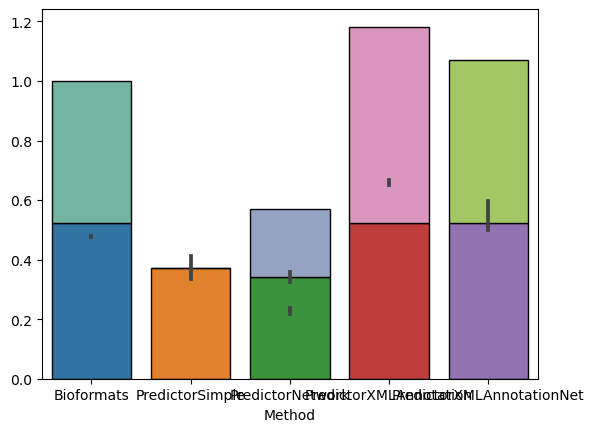

In [133]:
import pandas as pd
from OME_evaluator import OMEEvaluator
import matplotlib.pyplot as plt
import seaborn as sns
df_sample = pd.read_csv("/home/aaron/Documents/Projects/MetaGPT/out/data_frames/sample_df.csv")

normalization_values = df_sample[df_sample['Method'] == 'Bioformats'].set_index('Name')['n_paths']



fig, ax = plt.subplots()
norm_values_n_paths = df_sample[df_sample['Method'] == 'Bioformats'].set_index('Name')['n_paths']

n_path_plt = sns.barplot(
    x=df_sample["Method"],
    y=df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"],
    edgecolor='black',
    ax=ax,
    label="OME Paths")

bottom_heights = [patch.get_height() for patch in n_path_plt.patches]
print(bottom_heights)
n_annot_plt = sns.barplot(
    x=df_sample["Method"],
    y=df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (1-(df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"]),
    edgecolor='black',
    ax=ax,
    palette="Set2",
    label="Annotation Paths",
    bottom= bottom_heights,
    )

#eval = OMEEvaluator()
#eval.format_counts_plt(df)

In [115]:
bottom_heights = [patch.get_height() for patch in n_path_plt.patches]

In [127]:
ax.errorbar(x= 5, y=5)

<ErrorbarContainer object of 3 artists>

In [122]:
top_error_bars = [child for child in ax.get_children() if isinstance(child, plt.ErrorbarContainer)][0]
top_error_positions = top_error_bars.get_children()[0].get_segments()

AttributeError: module 'matplotlib.pyplot' has no attribute 'ErrorbarContainer'

In [109]:
n_annot_plt = sns.barplot(
    x=df_sample["Method"],
    y=df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (1-(df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"]),
    edgecolor='black',
    ax=ax,
    palette="Set2",
    label="Annotation Paths",
    bottom= (df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (1-(df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"]))[:5],
    )

plt.show()

In [100]:
(df_sample.apply(
    lambda row: (row['n_paths'] / norm_values_n_paths[row['Name']]),
    axis=1) * (1-(df_sample["n_paths"]-df_sample["n_annotations"])/df_sample["n_paths"]))[:5]

0    0.476190
1    0.000000
2    0.238095
3    0.666667
4    0.595238
dtype: float64

In [141]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/home/aaron/mambaforge/envs/metagpt/lib/python3.9/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


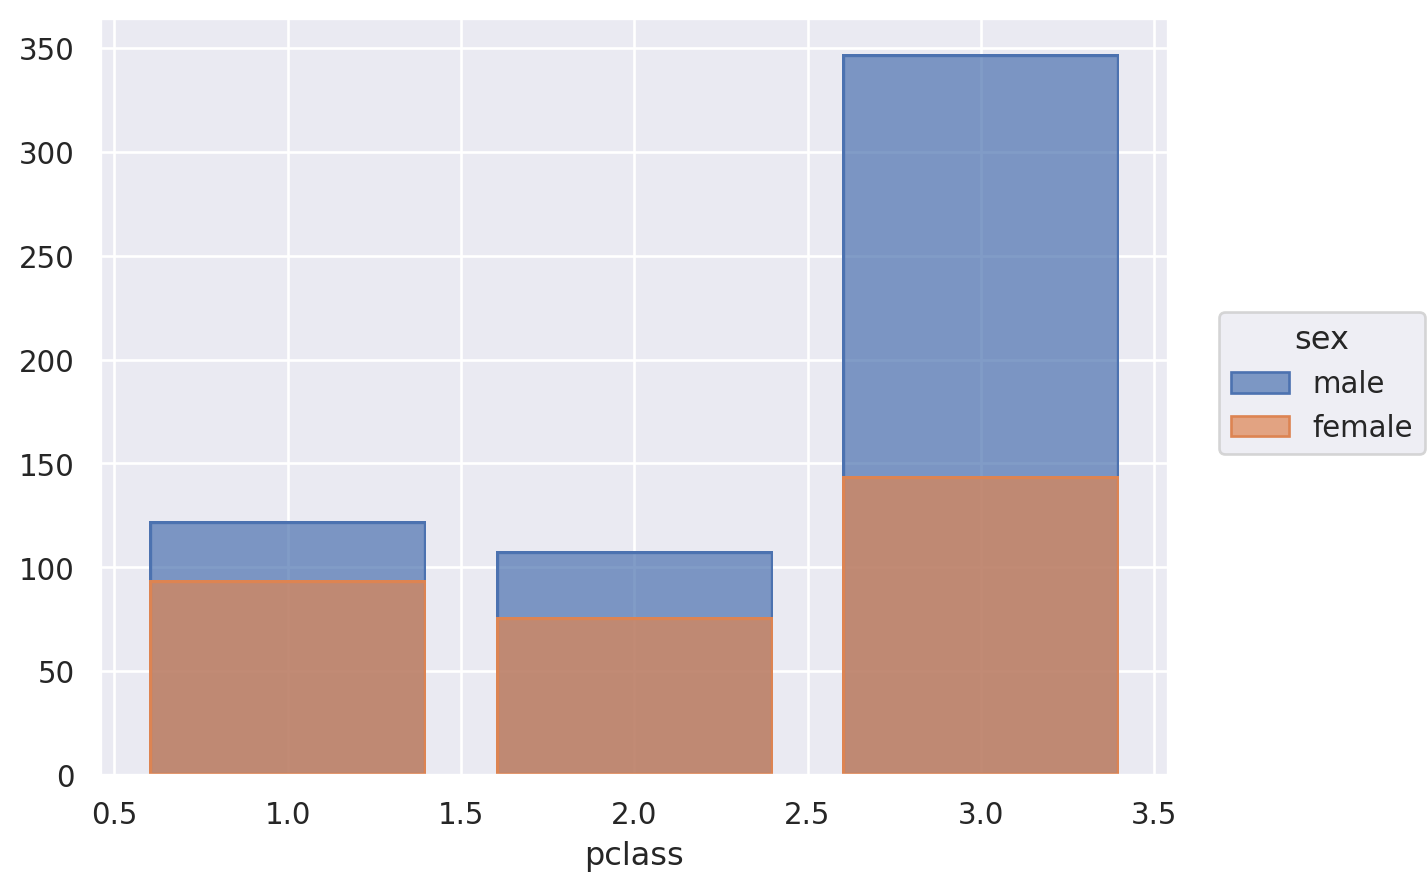

In [135]:
import seaborn as sns 
import seaborn.objects as so 
df = sns.load_dataset('titanic')
df.head() 
so.Plot(df, x="pclass", color="sex").add(so.Bar(), so.Count())